# **1. EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [ ]:
df = pd.read_csv('MBG_GABUNGAN.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      2049 non-null   int64  
 1   created_at               2049 non-null   object 
 2   favorite_count           2049 non-null   int64  
 3   full_text                2049 non-null   object 
 4   id_str                   2049 non-null   int64  
 5   image_url                275 non-null    object 
 6   in_reply_to_screen_name  1217 non-null   object 
 7   lang                     2049 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              2049 non-null   int64  
 10  reply_count              2049 non-null   int64  
 11  retweet_count            2049 non-null   int64  
 12  tweet_url                2049 non-null   object 
 13  user_id_str              2049 non-null   int64  
 14  username;;;;            

In [ ]:
print(df.isnull().sum())
print()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  1774
in_reply_to_screen_name     832
lang                          0
location                   2049
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username;;;;                  1
dtype: int64



In [ ]:
df.duplicated().sum()

np.int64(0)

#**Data Cleaning**

In [ ]:
df = df.drop(columns=['id_str', 'image_url', 'conversation_id_str', 'favorite_count' ,'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username;;;;'])
print("Columns dropped successfully.")
df.info()

Columns dropped successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  2049 non-null   object
 1   full_text   2049 non-null   object
dtypes: object(2)
memory usage: 32.1+ KB


In [ ]:
# Konversi type data
df.loc[:, 'created_at'] = pd.to_datetime(df['created_at'])
df = df.copy()
df['created_at'] = pd.to_datetime(df['created_at'])
print(df.dtypes)

/tmp/ipython-input-4211633652.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.loc[:, 'created_at'] = pd.to_datetime(df['created_at'])


created_at    datetime64[ns, UTC]
full_text                  object
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  2049 non-null   datetime64[ns, UTC]
 1   full_text   2049 non-null   object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 32.1+ KB


**VISUALISASI DATA MENTAH**



In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

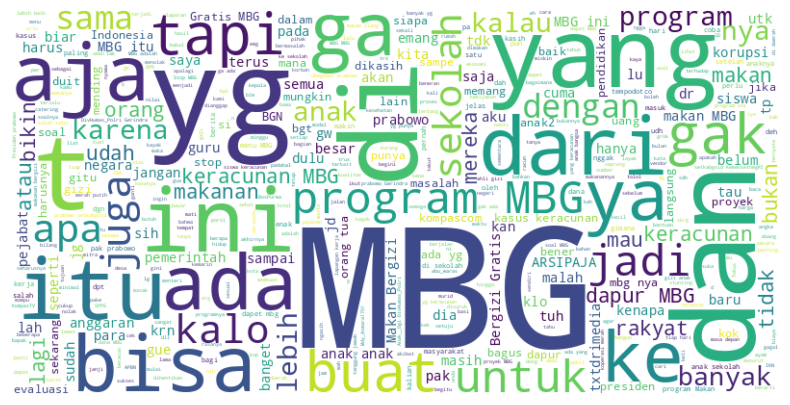

In [ ]:
# Melihat distribusi kata yang sering muncul
text = ''.join(df['full_text'].astype(str).tolist())
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])
wc = WordCloud(background_color='white', max_words=1000, width=800, height=400, stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

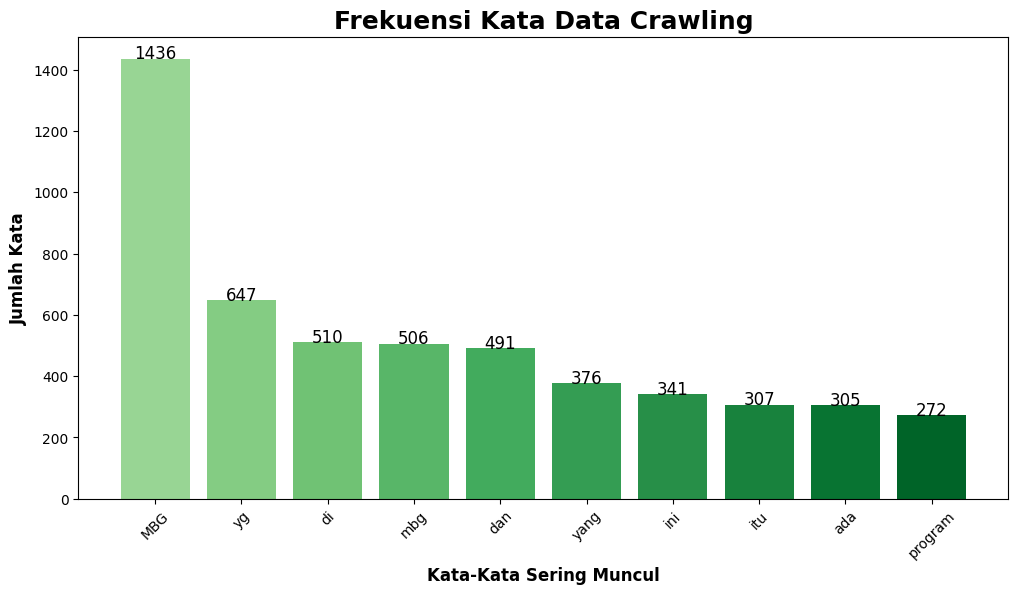

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Ambil 10 kata teratas
text = ' '.join(df['full_text'].dropna().astype(str))
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Gunakan colormap warna seiras
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)

plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata Data Crawling", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka di atas bar
for bar, num in zip(bars, count):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        str(num),
        fontsize=12,
        color='black',
        ha='center'
    )

plt.show()


 **LABELING**

## Labeling indoBERT





In [ ]:
FILE_PATH = "MBG_GABUNGAN.csv"
TEXT_COLUMN = "full_text"


In [ ]:
import pandas as pd

df = pd.read_csv(FILE_PATH)
print("Jumlah data:", len(df))
print(df[[TEXT_COLUMN]].head())

Jumlah data: 2049
                                           full_text
0                    @xunirng dapet mbg nggak abang 
1  pagi pagi ke prapatan buat ngurus seleksi boca...
2  @LeeHeefseung berharap dapet MBG kah ini konse...
3  @ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...
4  @GelarPrakosa Apa ini quotes dari pajangan di ...


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_name = "mdhugol/indonesia-bert-sentiment-classification"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

device = 0 if torch.cuda.is_available() else -1

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=device
)

Device set to use cuda:0


In [ ]:
from tqdm import tqdm

LABEL_MAPPING = {
    "LABEL_0": "positive",
    "LABEL_1": "neutral",
    "LABEL_2": "negative"
}

auto_labels = []

for text in tqdm(df[TEXT_COLUMN], desc="Labeling RAW Text"):
    if pd.isna(text) or str(text).strip() == "":
        auto_labels.append("neutral")
        continue

    result = sentiment_pipeline(str(text))[0]
    label = result["label"]
    auto_labels.append(LABEL_MAPPING[label])

df["auto_label"] = auto_labels


Labeling RAW Text: 100%|██████████| 2049/2049 [00:18<00:00, 109.78it/s]


In [ ]:
df = df.drop(columns=['id_str', 'image_url', 'conversation_id_str', 'favorite_count' ,'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username;;;;'])
print("Columns dropped successfully.")
df.info()


Columns dropped successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  2049 non-null   object
 1   full_text   2049 non-null   object
 2   auto_label  2049 non-null   object
dtypes: object(3)
memory usage: 48.2+ KB


In [ ]:
df.to_csv("labeling_indobert.csv", index=False)
print("selesai labeling_indobert.csv")

selesai labeling_indobert.csv


In [ ]:
df.head(150)

,created_at,full_text,auto_label
0,Sat Sep 06 16:18:08 +0000 2025,@xunirng dapet mbg nggak abang,neutral
1,Sat Sep 06 16:02:00 +0000 2025,pagi pagi ke prapatan buat ngurus seleksi boca...,neutral
2,Sat Sep 06 15:56:01 +0000 2025,@LeeHeefseung berharap dapet MBG kah ini konse...,neutral
3,Sat Sep 06 15:55:19 +0000 2025,@ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...,positive
4,Sat Sep 06 15:51:11 +0000 2025,@GelarPrakosa Apa ini quotes dari pajangan di ...,negative
...,...,...,...
145,Sat Sep 06 09:10:10 +0000 2025,Dipakai Dapur MBG Tempat Hiburan Malam Nunukan...,neutral
146,Sat Sep 06 09:10:03 +0000 2025,CB YG NGOMONG INI DIKSH MKN MBG YG BUSUK DL DONG,negative
147,Sat Sep 06 09:09:58 +0000 2025,Dimana gizi..MBG gak jauh beda dengan Makanan ...,neutral
148,Sat Sep 06 09:09:47 +0000 2025,@ARSIPAJA Gue aja sebagai ortu males makan mak...,negative


In [ ]:
# print(df.head(5))
print(df["auto_label"].value_counts())

auto_label
negative    1183
neutral      639
positive     227
Name: count, dtype: int64


# **2. PRE-PROCESSING**

**CASE FOLDING**


In [ ]:
import re
import string
import nltk

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

print("created_at converted to datetime successfully.")
print(df.info())



created_at converted to datetime successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   created_at  2049 non-null   datetime64[ns, UTC]
 1   full_text   2049 non-null   object             
 2   auto_label  2049 non-null   object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 48.2+ KB
None


/tmp/ipython-input-4115837440.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [ ]:
# Menghapus URL
def remove_URL(teks):
  if teks is not None and isinstance(teks, str):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', teks)
  else:
    return teks

# Menghapus HTML
def remove_html(teks):
  if teks is not None and isinstance(teks, str):
    html = re.compile(r'<.*?>')
    return html.sub(r'', teks)
  else:
    return teks

# Menghapus mention
def remove_mentions(teks):
    if teks is not None and isinstance(teks, str):
        return re.sub(r'@[A-Za-z0-9_\.]+', '', teks)
    return teks

# Menghapus emoji
def remove_emoji(teks):
    if teks is not None and isinstance(teks, str):
        emoji_pattern = re.compile(
            '['
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U00002702-\U000027B0"
            "]+", flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', teks)
    else:
        return teks

# Normalisasi huruf berulang
def normalize_repeated_chars(teks):
    if teks is not None and isinstance(teks, str):
        teks = re.sub(r'(.)\1{2,}', r'\1', teks)
        return teks
    else:
        return teks

  # Menghapus simbol
def replace_punctuation_with_space(teks):
    if teks is not None and isinstance(teks, str):
        teks = re.sub(r'[^\w\s]', ' ', teks)
        return teks
    else:
        return teks

# Menghapus spasi berlebih
def remove_extra_spaces(teks):
    if isinstance(teks, str):
        teks = re.sub(r'\s+', ' ', teks).strip()
        return teks
    return teks

# Menghapus baris kosong
def remove_empty_lines(teks):
    if teks is not None and isinstance(teks, str):
        teks = teks.strip()
        if teks == '':
            teks = None
    return teks

# Menghapus angka
def remove_numbers(teks):
    if teks is not None and isinstance(teks, str):
        teks = re.sub(r'\d+', '', teks)
    return teks

# Menghapus repeated laughs
def remove_laugh_variations(teks):
    if isinstance(teks, str):
        teks = re.sub(r'\b(wk)+w?\b', '', teks, flags=re.IGNORECASE)
        teks = re.sub(r'\b(ha)+h?\b', '', teks, flags=re.IGNORECASE)
        teks = re.sub(r'\b(hi)+h?\b', '', teks, flags=re.IGNORECASE)
        teks = re.sub(r'\b(he)+h?\b', '', teks, flags=re.IGNORECASE)
        teks = re.sub(r'\b(kw)+\b', '', teks)
        teks = re.sub(r'\b(xi)+\b', '', teks, flags=re.IGNORECASE)
        return teks.strip()
    return teks

In [ ]:
# Menggabungkan semua data cleaning menjadi satu
df['cleaning'] = df['full_text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_mentions(x))
df['cleaning'] = df['cleaning'].apply(lambda x: replace_punctuation_with_space(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_extra_spaces(x))
df['cleaning'] = df['cleaning'].apply(lambda x: normalize_repeated_chars(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_empty_lines(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_laugh_variations(x))

df.head(10)

,created_at,full_text,auto_label,cleaning
0,2025-09-06 16:18:08+00:00,@xunirng dapet mbg nggak abang,neutral,dapet mbg nggak abang
1,2025-09-06 16:02:00+00:00,pagi pagi ke prapatan buat ngurus seleksi boca...,neutral,pagi pagi ke prapatan buat ngurus seleksi boca...
2,2025-09-06 15:56:01+00:00,@LeeHeefseung berharap dapet MBG kah ini konse...,neutral,berharap dapet MBG kah ini konsepnya
3,2025-09-06 15:55:19+00:00,@ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...,positive,Hmm Di tempatku Salah satu kabupaten di sumate...
4,2025-09-06 15:51:11+00:00,@GelarPrakosa Apa ini quotes dari pajangan di ...,negative,Apa ini quotes dari pajangan di dapur MBG
5,2025-09-06 15:47:30+00:00,@crawdied kamu makan mbg aja,neutral,kamu makan mbg aja
6,2025-09-06 15:47:27+00:00,@ribkadel @BBCIndonesia Ya Allah abis baca ber...,neutral,Ya Allah abis baca berita ibu dan anak meningg...
7,2025-09-06 15:46:47+00:00,tapi iya sih emg perlu dipertimbangkan lagi so...,negative,tapi iya sih emg perlu dipertimbangkan lagi so...
8,2025-09-06 15:38:19+00:00,Usul sih setiap pembuatan menu MBG dibikin vid...,neutral,Usul sih setiap pembuatan menu MBG dibikin vid...
9,2025-09-06 15:31:48+00:00,@kba_news Maju maju maju hdp jkw?! Mbg Pantura...,neutral,Maju maju maju hdp jkw Mbg PanturaGiantsea wal...


In [ ]:
# Menyeragamkan ulasan merubah huruf besar menjadi kecil
def case_folding(teks):
  if teks is not None and isinstance(teks, str):
    return teks.lower()
  else:
    return teks

#  Buat DataFrame berdasarkan kolom yang kamu miliki
data = pd.DataFrame(df[['created_at', 'full_text', 'auto_label', 'cleaning']])

# Terapkan normalisasi kata tidak baku
data['case_folding'] = data['cleaning'].apply(lambda x: case_folding(x))

# Simpan hasil akhir ke df
df = pd.DataFrame(data[['created_at', 'full_text', 'auto_label', 'cleaning', 'case_folding']])

df.head(5)

,created_at,full_text,auto_label,cleaning,case_folding
0,2025-09-06 16:18:08+00:00,@xunirng dapet mbg nggak abang,neutral,dapet mbg nggak abang,dapet mbg nggak abang
1,2025-09-06 16:02:00+00:00,pagi pagi ke prapatan buat ngurus seleksi boca...,neutral,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat ngurus seleksi boca...
2,2025-09-06 15:56:01+00:00,@LeeHeefseung berharap dapet MBG kah ini konse...,neutral,berharap dapet MBG kah ini konsepnya,berharap dapet mbg kah ini konsepnya
3,2025-09-06 15:55:19+00:00,@ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...,positive,Hmm Di tempatku Salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...
4,2025-09-06 15:51:11+00:00,@GelarPrakosa Apa ini quotes dari pajangan di ...,negative,Apa ini quotes dari pajangan di dapur MBG,apa ini quotes dari pajangan di dapur mbg


**Kata Slang/Dictionary**

In [ ]:
# Kamus kata tidak baku
kamus_data = pd.read_excel('/content/kamuskatabaku1.xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
display(kamus_data)


,tidak_baku,kata_baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa
...,...,...
16330,mbyack,mbak
16331,bangun jam,bangun pukul
16332,bocilku,anak saya
16333,ngebersihin,membersihkan


In [ ]:
import hashlib

def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
                clean_word = re.sub(r'^\W+|\W+$', '', word.lower())


                if clean_word in kamus_tidak_baku:
                    baku_word = kamus_tidak_baku.get(clean_word)

                    if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                        replaced_words.append(baku_word)
                        kalimat_baku.append(baku_word)
                        kata_diganti.append(clean_word)
                        kata_tidak_baku_hash.append(
                            hashlib.md5(clean_word.encode()).hexdigest()
                        )
                    else:
                        replaced_words.append(word)

                else:
                    replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

data = pd.DataFrame(df[['created_at', 'full_text', 'auto_label', 'cleaning', 'case_folding']])

data['normalisasi'], data['kata_baku'], data['kata_tidak_baku'], data['kata_tidak_baku_hash'] = zip(
    *data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku))
)

df = pd.DataFrame(data[['created_at', 'full_text', 'auto_label', 'cleaning', 'case_folding', 'normalisasi']])

df.head()

,created_at,full_text,auto_label,cleaning,case_folding,normalisasi
0,2025-09-06 16:18:08+00:00,@xunirng dapet mbg nggak abang,neutral,dapet mbg nggak abang,dapet mbg nggak abang,dapat mbg tidak abang
1,2025-09-06 16:02:00+00:00,pagi pagi ke prapatan buat ngurus seleksi boca...,neutral,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat urus seleksi bocah ...
2,2025-09-06 15:56:01+00:00,@LeeHeefseung berharap dapet MBG kah ini konse...,neutral,berharap dapet MBG kah ini konsepnya,berharap dapet mbg kah ini konsepnya,harap dapat mbg kah ini konsep
3,2025-09-06 15:55:19+00:00,@ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...,positive,Hmm Di tempatku Salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...
4,2025-09-06 15:51:11+00:00,@GelarPrakosa Apa ini quotes dari pajangan di ...,negative,Apa ini quotes dari pajangan di dapur MBG,apa ini quotes dari pajangan di dapur mbg,apa ini quotes dari pajangan di dapur mbg


PUNCTUATION

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
# Download resource NLTK
nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenisasi
def tokenisasi(teks):
    if teks is not None and isinstance(teks, str):
        tokens = word_tokenize(teks)

         # tambahan: bersihkan token hasil split
        cleaned_tokens = [
            t.strip().lower()
            for t in tokens
            if t.strip() not in ['', ' ', '.', ',', '!', '?', ';', ':', '-', '–', '—', "'", '"']
        ]
        return cleaned_tokens
    else:
        return []

#  Buat DataFrame berdasarkan kolom yang kamu miliki
data = pd.DataFrame(df[['created_at', 'full_text', 'auto_label', 'cleaning', 'case_folding', 'normalisasi']])

# Terapkan normalisasi kata tidak baku
data['tokenisasi'] = data['normalisasi'].apply(lambda x: tokenisasi(x))

# Simpan hasil akhir ke df
df = pd.DataFrame(data[['created_at', 'full_text', 'auto_label', 'cleaning', 'case_folding', 'normalisasi', 'tokenisasi']])

df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,created_at,full_text,auto_label,cleaning,case_folding,normalisasi,tokenisasi
0,2025-09-06 16:18:08+00:00,@xunirng dapet mbg nggak abang,neutral,dapet mbg nggak abang,dapet mbg nggak abang,dapat mbg tidak abang,"[dapat, mbg, tidak, abang]"
1,2025-09-06 16:02:00+00:00,pagi pagi ke prapatan buat ngurus seleksi boca...,neutral,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat urus seleksi bocah ...,"[pagi, pagi, ke, prapatan, buat, urus, seleksi..."
2,2025-09-06 15:56:01+00:00,@LeeHeefseung berharap dapet MBG kah ini konse...,neutral,berharap dapet MBG kah ini konsepnya,berharap dapet mbg kah ini konsepnya,harap dapat mbg kah ini konsep,"[harap, dapat, mbg, kah, ini, konsep]"
3,2025-09-06 15:55:19+00:00,@ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...,positive,Hmm Di tempatku Salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,"[hmm, di, tempatku, salah, satu, kabupaten, di..."
4,2025-09-06 15:51:11+00:00,@GelarPrakosa Apa ini quotes dari pajangan di ...,negative,Apa ini quotes dari pajangan di dapur MBG,apa ini quotes dari pajangan di dapur mbg,apa ini quotes dari pajangan di dapur mbg,"[apa, ini, quotes, dari, pajangan, di, dapur, ..."


STEMMING

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
# Kamus translate Bahasa ke Indonesia
kamus_indo = {
    # Kata ganti
    'iku': 'itu', 'kui': 'itu', 'iki': 'ini', 'kene': 'sini', 'kono': 'sana',
    'e': 'nya', 'dewe': 'sendiri', 'kabeh': 'semua',

    # Kata kerja
    'gawe': 'buat', 'wes': 'sudah', 'ojo': 'jangan', 'iso': 'bisa',
    'arep': 'akan', 'lungo': 'pergi', 'turu': 'tidur', 'mangan': 'makan',
    'ndelok': 'lihat', 'ngomong': 'bicara', 'gelem': 'mau',
    'due': 'punya', 'gaonok': 'tidak ada', 'onok': 'ada',

    # Kata benda
    'wedoke': 'perempuan', 'lanange': 'laki-laki', 'jenenge': 'namanya',
    'omah': 'rumah', 'uwong': 'orang', 'bocah': 'anak',

    # Kata sifat
    'apik': 'bagus', 'elek': 'jelek', 'gedhe': 'besar', 'cilik': 'kecil',
    'ayu': 'cantik', 'pinter': 'pintar', 'blas': 'sama sekali',

    # Kata hubung
    'koyok': 'seperti', 'mergane': 'karena', 'ngunu': 'begitu',
    'ben': 'biar', 'nek': 'kalau', 'ning': 'tapi', 'hmm': '',

    # Kata umum Twitter & typo
    'mending':'lebih baik', 'mend': 'lebih baik', 'piye': 'bagaimana',
    'apa': 'apa', 'sing': 'yang', 'neng': 'di',
    'ra': 'tidak', 'ora': 'tidak', 'gak': 'tidak', 'ga': 'tidak',
    'nggak': 'tidak', 'kayanya': 'sepertinya', 'sere': 'sering',
    'lukh': 'lu', 'mengapai': 'ngapain', 'gtu': 'gitu',

    # Inggris
    'the': 'salah', 'least': 'satu', 'can': 'dapat', 'do': 'dilakukan',
    'effort': 'usaha', 'about': 'tentang', 'you': 'kamu', 'what': 'apa', 'why': 'kenapa',
    'we': 'kita', 'win': 'menang'
}

In [ ]:
# Fungsi translate Jawa ke Indo (diterapkan SEBELUM stopword removal)
def translate_to_indo(tokens):
    if isinstance(tokens, list):
        translated = []
        for word in tokens:
            w = word.lower().strip()
            if w in kamus_indo:
                translated.append(kamus_indo[word])
            else:
                translated.append(w)
        return translated
    return tokens

df['translate_indo'] = df['tokenisasi'].apply(translate_to_indo)

factory = StopWordRemoverFactory()
stop_words = set([w.lower() for w in factory.get_stop_words()])

tambahan_stopword = {
    'ya', 'loh', 'dong', 'nih', 'sih', 'nya', 'lah', 'deh', 'kok',
    'njir', 'anjir', 'jir', 'wkwk', 'gtu', 'gitu', 'ah',
    'kalau', 'jadi', 'sama', 'punya', 'orang', 'bisa',
    'akan', 'harus', 'ada', 'juga', 'sudah', 'nanti', 'wkwkw', 'wkwkwk',
    'wkwkwkw', 'wkwkwkwk', 'wkwkwkwkwk', 'buat', 'ah', 'kamu', 'gue', 'lo',
    'gw', 'apa', 'hmm', 'Hmmm',
}
stop_words = stop_words.union({w.lower() for w in tambahan_stopword})

def remove_stopwords(tokens):
    if not isinstance(tokens, list):
        return []

    cleaned = []
    for word in tokens:
        w = word.lower().strip()

        if w in stop_words:
            continue
        if len(w) <= 1:
            continue
        if not w.isalpha():
            continue

        cleaned.append(w)

    return cleaned

df['stopword_removal'] = df['translate_indo'].apply(remove_stopwords)

df.head()

,created_at,full_text,auto_label,cleaning,case_folding,normalisasi,tokenisasi,translate_indo,stopword_removal
0,2025-09-06 16:18:08+00:00,@xunirng dapet mbg nggak abang,neutral,dapet mbg nggak abang,dapet mbg nggak abang,dapat mbg tidak abang,"[dapat, mbg, tidak, abang]","[dapat, mbg, tidak, abang]","[mbg, abang]"
1,2025-09-06 16:02:00+00:00,pagi pagi ke prapatan buat ngurus seleksi boca...,neutral,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat urus seleksi bocah ...,"[pagi, pagi, ke, prapatan, buat, urus, seleksi...","[pagi, pagi, ke, prapatan, buat, urus, seleksi...","[pagi, pagi, prapatan, urus, seleksi, anak, an..."
2,2025-09-06 15:56:01+00:00,@LeeHeefseung berharap dapet MBG kah ini konse...,neutral,berharap dapet MBG kah ini konsepnya,berharap dapet mbg kah ini konsepnya,harap dapat mbg kah ini konsep,"[harap, dapat, mbg, kah, ini, konsep]","[harap, dapat, mbg, kah, ini, konsep]","[harap, mbg, konsep]"
3,2025-09-06 15:55:19+00:00,@ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...,positive,Hmm Di tempatku Salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,"[hmm, di, tempatku, salah, satu, kabupaten, di...","[, di, tempatku, salah, satu, kabupaten, di, s...","[tempatku, salah, satu, kabupaten, sumatera, s..."
4,2025-09-06 15:51:11+00:00,@GelarPrakosa Apa ini quotes dari pajangan di ...,negative,Apa ini quotes dari pajangan di dapur MBG,apa ini quotes dari pajangan di dapur mbg,apa ini quotes dari pajangan di dapur mbg,"[apa, ini, quotes, dari, pajangan, di, dapur, ...","[apa, ini, quotes, dari, pajangan, di, dapur, ...","[quotes, pajangan, dapur, mbg]"


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    # Jika bukan list (misal NaN), kembalikan kosong
    if not isinstance(tokens, list):
        return []

    hasil = []
    for word in tokens:
        w = str(word).lower().strip()
        stemmed = stemmer.stem(w)
        hasil.append(stemmed)

    return hasil

df['stemming'] = df['stopword_removal'].apply(stemming)

df.head()

,created_at,full_text,auto_label,cleaning,case_folding,normalisasi,tokenisasi,translate_indo,stopword_removal,stemming
0,2025-09-06 16:18:08+00:00,@xunirng dapet mbg nggak abang,neutral,dapet mbg nggak abang,dapet mbg nggak abang,dapat mbg tidak abang,"[dapat, mbg, tidak, abang]","[dapat, mbg, tidak, abang]","[mbg, abang]","[mbg, abang]"
1,2025-09-06 16:02:00+00:00,pagi pagi ke prapatan buat ngurus seleksi boca...,neutral,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat urus seleksi bocah ...,"[pagi, pagi, ke, prapatan, buat, urus, seleksi...","[pagi, pagi, ke, prapatan, buat, urus, seleksi...","[pagi, pagi, prapatan, urus, seleksi, anak, an...","[pagi, pagi, prapatan, urus, seleksi, anak, an..."
2,2025-09-06 15:56:01+00:00,@LeeHeefseung berharap dapet MBG kah ini konse...,neutral,berharap dapet MBG kah ini konsepnya,berharap dapet mbg kah ini konsepnya,harap dapat mbg kah ini konsep,"[harap, dapat, mbg, kah, ini, konsep]","[harap, dapat, mbg, kah, ini, konsep]","[harap, mbg, konsep]","[harap, mbg, konsep]"
3,2025-09-06 15:55:19+00:00,@ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...,positive,Hmm Di tempatku Salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,"[hmm, di, tempatku, salah, satu, kabupaten, di...","[, di, tempatku, salah, satu, kabupaten, di, s...","[tempatku, salah, satu, kabupaten, sumatera, s...","[tempat, salah, satu, kabupaten, sumatera, sel..."
4,2025-09-06 15:51:11+00:00,@GelarPrakosa Apa ini quotes dari pajangan di ...,negative,Apa ini quotes dari pajangan di dapur MBG,apa ini quotes dari pajangan di dapur mbg,apa ini quotes dari pajangan di dapur mbg,"[apa, ini, quotes, dari, pajangan, di, dapur, ...","[apa, ini, quotes, dari, pajangan, di, dapur, ...","[quotes, pajangan, dapur, mbg]","[quotes, pajang, dapur, mbg]"


SIMPAN DATA BERSIH

In [ ]:
# Gabungkan token jadi kalimat lagi
df['text_clean'] = df['stemming'].apply(
    lambda x: ' '.join([str(w) for w in x]) if isinstance(x, list) else ''
)

# Hapus baris yang kosong atau tidak bermakna setelah pre-processing
df_clean = df[
    df['text_clean'].notna() &
    (df['text_clean'].str.strip() != '') &
    (df['text_clean'].str.len() > 1)
].copy()

print("Text clean dibuat")
print(f"Jumlah data sebelum cleaning: {len(df)}")
print(f"Jumlah data setelah cleaning: {len(df_clean)}")

# Update df dengan df_clean
df = df_clean.copy()

Text clean dibuat
Jumlah data sebelum cleaning: 2049
Jumlah data setelah cleaning: 2049


In [ ]:
df.to_csv('data_clean.csv', index=False)

In [ ]:
df.head(5)

,created_at,full_text,auto_label,cleaning,case_folding,normalisasi,tokenisasi,translate_indo,stopword_removal,stemming,text_clean
0,2025-09-06 16:18:08+00:00,@xunirng dapet mbg nggak abang,neutral,dapet mbg nggak abang,dapet mbg nggak abang,dapat mbg tidak abang,"[dapat, mbg, tidak, abang]","[dapat, mbg, tidak, abang]","[mbg, abang]","[mbg, abang]",mbg abang
1,2025-09-06 16:02:00+00:00,pagi pagi ke prapatan buat ngurus seleksi boca...,neutral,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat ngurus seleksi boca...,pagi pagi ke prapatan buat urus seleksi bocah ...,"[pagi, pagi, ke, prapatan, buat, urus, seleksi...","[pagi, pagi, ke, prapatan, buat, urus, seleksi...","[pagi, pagi, prapatan, urus, seleksi, anak, an...","[pagi, pagi, prapatan, urus, seleksi, anak, an...",pagi pagi prapatan urus seleksi anak anak teru...
2,2025-09-06 15:56:01+00:00,@LeeHeefseung berharap dapet MBG kah ini konse...,neutral,berharap dapet MBG kah ini konsepnya,berharap dapet mbg kah ini konsepnya,harap dapat mbg kah ini konsep,"[harap, dapat, mbg, kah, ini, konsep]","[harap, dapat, mbg, kah, ini, konsep]","[harap, mbg, konsep]","[harap, mbg, konsep]",harap mbg konsep
3,2025-09-06 15:55:19+00:00,@ARSIPAJA Hmm.. Di tempatku. Salah satu kabupa...,positive,Hmm Di tempatku Salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,hmm di tempatku salah satu kabupaten di sumate...,"[hmm, di, tempatku, salah, satu, kabupaten, di...","[, di, tempatku, salah, satu, kabupaten, di, s...","[tempatku, salah, satu, kabupaten, sumatera, s...","[tempat, salah, satu, kabupaten, sumatera, sel...",tempat salah satu kabupaten sumatera selatan m...
4,2025-09-06 15:51:11+00:00,@GelarPrakosa Apa ini quotes dari pajangan di ...,negative,Apa ini quotes dari pajangan di dapur MBG,apa ini quotes dari pajangan di dapur mbg,apa ini quotes dari pajangan di dapur mbg,"[apa, ini, quotes, dari, pajangan, di, dapur, ...","[apa, ini, quotes, dari, pajangan, di, dapur, ...","[quotes, pajangan, dapur, mbg]","[quotes, pajang, dapur, mbg]",quotes pajang dapur mbg


In [ ]:
import pandas as pd

data = pd.read_csv('data_clean.csv')

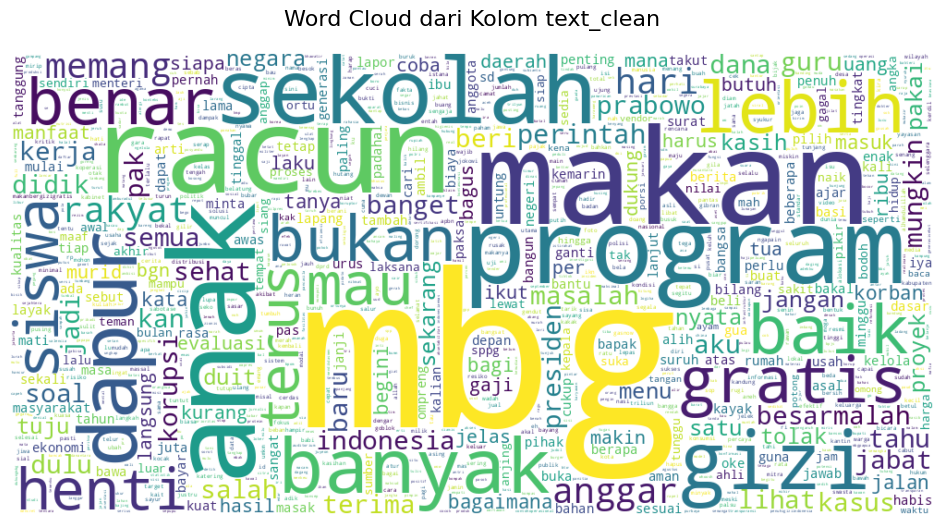

In [ ]:
text = ' '.join(df['text_clean'].dropna().astype(str))

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', 't', 'ya', 'aja'])

wc = WordCloud(
    background_color='white',
    max_words=1000,
    width=1000,
    height=500,
    stopwords=stopwords,
    collocations=False
).generate(text)
-
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud dari Kolom text_clean", fontsize=16, pad=20)
plt.show()

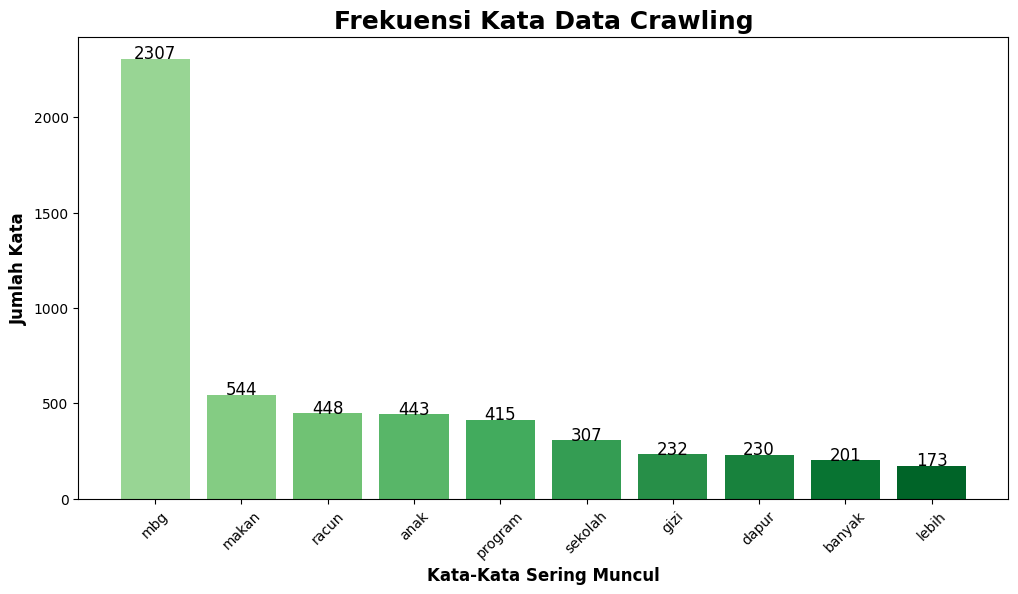

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Ambil 10 kata teratas
text = ' '.join(df['text_clean'].dropna().astype(str))
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

# Gunakan colormap warna seiras
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)

plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata Data Crawling", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka di atas bar
for bar, num in zip(bars, count):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        str(num),
        fontsize=12,
        color='black',
        ha='center'
    )

plt.show()

#**3. LABEL SEMI UNSUPERVISE**





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("labeling_indobert.csv")

# Pastikan kolom sudah ada
print(df["auto_label"].value_counts())

auto_label
negative    1183
neutral      639
positive     227
Name: count, dtype: int64


In [ ]:
sampled_df = (
    df.groupby("auto_label")
      .apply(lambda x: x.sample(n=227, random_state=42))
      .reset_index(drop=True)
)

# Data latih yang benar-benar labeled
train_labeled = sampled_df.copy()

/tmp/ipython-input-748645068.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=227, random_state=42))


In [ ]:

unlabeled_df = df.drop(sampled_df.index).copy()
unlabeled_df["auto_label"] = None

print("Jumlah labeled:", len(train_labeled))
print("Jumlah unlabeled:", len(unlabeled_df))

Jumlah labeled: 681
Jumlah unlabeled: 1368


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# TF-IDF Khusus Data Berlabel
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(train_labeled["full_text"])
y = train_labeled["auto_label"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

print("\n=== MODEL AWAL: SVM ===")

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))



=== MODEL AWAL: SVM ===
SVM Accuracy: 0.5766423357664233
              precision    recall  f1-score   support

    negative       0.56      0.69      0.62        45
     neutral       0.60      0.54      0.57        46
    positive       0.57      0.50      0.53        46

    accuracy                           0.58       137
   macro avg       0.58      0.58      0.57       137
weighted avg       0.58      0.58      0.57       137



In [ ]:
from sklearn.linear_model import LogisticRegression

print("\n=== MODEL AWAL: Logistic Regression ===")

lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))



=== MODEL AWAL: Logistic Regression ===
Logistic Regression Accuracy: 0.5693430656934306
              precision    recall  f1-score   support

    negative       0.54      0.69      0.61        45
     neutral       0.59      0.57      0.58        46
    positive       0.58      0.46      0.51        46

    accuracy                           0.57       137
   macro avg       0.57      0.57      0.57       137
weighted avg       0.57      0.57      0.57       137



In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n=== MODEL AWAL: Random Forest ===")

rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))



=== MODEL AWAL: Random Forest ===
Random Forest Accuracy: 0.5474452554744526
              precision    recall  f1-score   support

    negative       0.54      0.47      0.50        45
     neutral       0.53      0.78      0.63        46
    positive       0.60      0.39      0.47        46

    accuracy                           0.55       137
   macro avg       0.56      0.55      0.54       137
weighted avg       0.56      0.55      0.54       137



In [ ]:
from sklearn.naive_bayes import MultinomialNB

print("\n=== MODEL AWAL: Multinomial Naive Bayes ===")

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))



=== MODEL AWAL: Multinomial Naive Bayes ===
MultinomialNB Accuracy: 0.5182481751824818
              precision    recall  f1-score   support

    negative       0.51      0.60      0.55        45
     neutral       0.60      0.46      0.52        46
    positive       0.47      0.50      0.48        46

    accuracy                           0.52       137
   macro avg       0.53      0.52      0.52       137
weighted avg       0.53      0.52      0.52       137



In [ ]:
X_unlabeled = vectorizer.transform(unlabeled_df["full_text"].astype(str))

print("Jumlah data unlabeled:", X_unlabeled.shape[0])


Jumlah data unlabeled: 1368


In [ ]:
pseudo_labels = svm_model.predict(X_unlabeled)

unlabeled_df["pseudo_label"] = pseudo_labels


In [ ]:
unlabeled_df[["full_text", "pseudo_label"]].head(20)


,full_text,pseudo_label
681,adek gue di-php-in mbg harusnya hari ini dapet...,negative
682,@okiksadboi Wkwkw apa kabar tuh si orang goblo...,negative
683,Bahan baku minyak babi memang digunakan dalam ...,neutral
684,@kompascom cerita dari ponakan² gue di sekolah...,negative
685,@nashihah_ @FunJunkies Nah ... Ini cocok jadi ...,negative
686,Beneran sampe gak tau lagi mau komen gimana. I...,positive
687,@widdyjp Loh kan MBG isinya udah include susu mas,positive
688,@tanyabiartahu Berdasarkan laporan media seper...,neutral
689,Food Tray MBG: Menu Bergizi Bikin Anak SD di L...,neutral
690,@ubegebe1 Hehe. Program MBG ini memang tdk leb...,positive


In [ ]:
combined_df = pd.concat([
    train_labeled[["full_text", "auto_label"]].rename(columns={"auto_label": "label"}),
    unlabeled_df[["full_text", "pseudo_label"]].rename(columns={"pseudo_label": "label"})
], ignore_index=True)

print("Jumlah data total setelah ditambah pseudo-label:", len(combined_df))


Jumlah data total setelah ditambah pseudo-label: 2049


# **4. Model TF - IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

vectorizer_full = TfidfVectorizer(max_features=5000)
X_full = vectorizer_full.fit_transform(combined_df["full_text"].astype(str))
y_full = combined_df["label"]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

In [ ]:
vectorizer_full = TfidfVectorizer(max_features=5000)
X_full = vectorizer_full.fit_transform(combined_df["full_text"])
y_full = combined_df["label"]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

In [ ]:
svm_final = LinearSVC()
svm_final.fit(X_train_full, y_train_full)

final_pred = svm_final.predict(X_test_full)
print("Final Model Accuracy:", accuracy_score(y_test_full, final_pred))
print(classification_report(y_test_full, final_pred))

Final Model Accuracy: 0.8463414634146341
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87       165
     neutral       0.84      0.87      0.85       126
    positive       0.84      0.76      0.80       119

    accuracy                           0.85       410
   macro avg       0.85      0.84      0.84       410
weighted avg       0.85      0.85      0.85       410



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_svm = {
    "C": [0.1, 0.5, 1, 2, 5, 10]
}

grid_svm = GridSearchCV(
    LinearSVC(max_iter=5000),
    param_svm,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train_full, y_train_full)

svm_best = grid_svm.best_estimator_

svm_pred = svm_best.predict(X_test_full)

print("\n=== TUNED FINAL SVM ===")
print("Best Params:", grid_svm.best_params_)
print("CV Best Score:", grid_svm.best_score_)
print("Test Accuracy:", accuracy_score(y_test_full, svm_pred))
print(classification_report(y_test_full, svm_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits

=== TUNED FINAL SVM ===
Best Params: {'C': 0.5}
CV Best Score: 0.8072089207130604
Test Accuracy: 0.8390243902439024
              precision    recall  f1-score   support

    negative       0.83      0.92      0.87       165
     neutral       0.84      0.85      0.85       126
    positive       0.85      0.72      0.78       119

    accuracy                           0.84       410
   macro avg       0.84      0.83      0.83       410
weighted avg       0.84      0.84      0.84       410



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

print("\n=== FINAL MODEL: Logistic Regression ===")

lr_final = LogisticRegression(max_iter=5000)
lr_final.fit(X_train_full, y_train_full)

lr_pred = lr_final.predict(X_test_full)

print("LR Final Accuracy:", accuracy_score(y_test_full, lr_pred))
print(classification_report(y_test_full, lr_pred))



=== FINAL MODEL: Logistic Regression ===
LR Final Accuracy: 0.7951219512195122
              precision    recall  f1-score   support

    negative       0.75      0.93      0.83       165
     neutral       0.87      0.75      0.81       126
    positive       0.81      0.66      0.73       119

    accuracy                           0.80       410
   macro avg       0.81      0.78      0.79       410
weighted avg       0.80      0.80      0.79       410



In [ ]:
from sklearn.linear_model import LogisticRegression

param_lr = {
    "C": [0.1, 0.5, 1, 2, 5, 10],
    "penalty": ["l2"],
    "solver": ["liblinear"]
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=5000),
    param_lr,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train_full, y_train_full)

lr_best = grid_lr.best_estimator_
lr_pred = lr_best.predict(X_test_full)

print("\n=== TUNED FINAL LOGISTIC REGRESSION ===")
print("Best Params:", grid_lr.best_params_)
print("CV Best Score:", grid_lr.best_score_)
print("Test Accuracy:", accuracy_score(y_test_full, lr_pred))
print(classification_report(y_test_full, lr_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits

=== TUNED FINAL LOGISTIC REGRESSION ===
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
CV Best Score: 0.8059856791228462
Test Accuracy: 0.8463414634146341
              precision    recall  f1-score   support

    negative       0.84      0.93      0.88       165
     neutral       0.85      0.86      0.85       126
    positive       0.86      0.72      0.79       119

    accuracy                           0.85       410
   macro avg       0.85      0.84      0.84       410
weighted avg       0.85      0.85      0.84       410



In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("\n=== FINAL MODEL: Random Forest ===")

rf_final = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train_full, y_train_full)

rf_pred = rf_final.predict(X_test_full)

print("RF Final Accuracy:", accuracy_score(y_test_full, rf_pred))
print(classification_report(y_test_full, rf_pred))



=== FINAL MODEL: Random Forest ===
RF Final Accuracy: 0.7585365853658537
              precision    recall  f1-score   support

    negative       0.71      0.90      0.80       165
     neutral       0.78      0.79      0.79       126
    positive       0.84      0.53      0.65       119

    accuracy                           0.76       410
   macro avg       0.78      0.74      0.74       410
weighted avg       0.77      0.76      0.75       410



In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_rf = {
    "n_estimators": [200, 300, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5],
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_full, y_train_full)

rf_best = grid_rf.best_estimator_
rf_pred = rf_best.predict(X_test_full)

print("\n=== TUNED FINAL RANDOM FOREST ===")
print("Best Params:", grid_rf.best_params_)
print("CV Best Score:", grid_rf.best_score_)
print("Test Accuracy:", accuracy_score(y_test_full, rf_pred))
print(classification_report(y_test_full, rf_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits

=== TUNED FINAL RANDOM FOREST ===
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
CV Best Score: 0.7492541209815768
Test Accuracy: 0.7585365853658537
              precision    recall  f1-score   support

    negative       0.71      0.90      0.80       165
     neutral       0.77      0.78      0.77       126
    positive       0.86      0.55      0.67       119

    accuracy                           0.76       410
   macro avg       0.78      0.74      0.75       410
weighted avg       0.77      0.76      0.75       410



In [ ]:
from sklearn.naive_bayes import MultinomialNB

print("\n=== FINAL MODEL: MultinomialNB ===")

nb_final = MultinomialNB()
nb_final.fit(X_train_full, y_train_full)

nb_pred = nb_final.predict(X_test_full)

print("NB Final Accuracy:", accuracy_score(y_test_full, nb_pred))
print(classification_report(y_test_full, nb_pred))



=== FINAL MODEL: MultinomialNB ===
NB Final Accuracy: 0.7292682926829268
              precision    recall  f1-score   support

    negative       0.64      0.96      0.77       165
     neutral       0.91      0.64      0.75       126
    positive       0.82      0.50      0.62       119

    accuracy                           0.73       410
   macro avg       0.79      0.70      0.71       410
weighted avg       0.77      0.73      0.72       410



In [ ]:
from sklearn.naive_bayes import MultinomialNB

param_nb = {
    "alpha": [0.1, 0.3, 0.5, 1, 2, 5]
}

grid_nb = GridSearchCV(
    MultinomialNB(),
    param_nb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_nb.fit(X_train_full, y_train_full)

nb_best = grid_nb.best_estimator_
nb_pred = nb_best.predict(X_test_full)

print("\n=== TUNED FINAL MULTINOMIAL NB ===")
print("Best Params:", grid_nb.best_params_)
print("CV Best Score:", grid_nb.best_score_)
print("Test Accuracy:", accuracy_score(y_test_full, nb_pred))
print(classification_report(y_test_full, nb_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits

=== TUNED FINAL MULTINOMIAL NB ===
Best Params: {'alpha': 0.3}
CV Best Score: 0.7394775117475945
Test Accuracy: 0.7780487804878049
              precision    recall  f1-score   support

    negative       0.73      0.91      0.81       165
     neutral       0.88      0.72      0.79       126
    positive       0.76      0.66      0.71       119

    accuracy                           0.78       410
   macro avg       0.79      0.76      0.77       410
weighted avg       0.79      0.78      0.78       410



#**CONFUSION METRIK TF - IDF**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


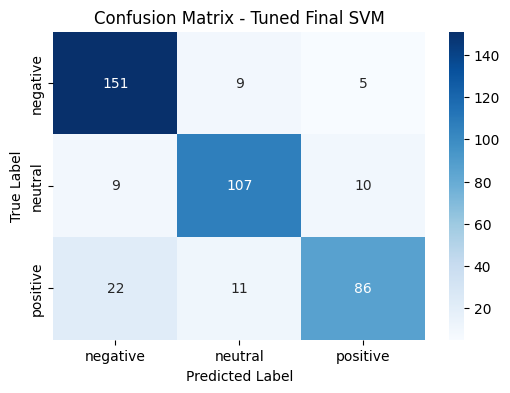

In [ ]:
cm_svm = confusion_matrix(y_test_full, svm_pred, labels=['negative','neutral','positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.title("Confusion Matrix - Tuned Final SVM")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


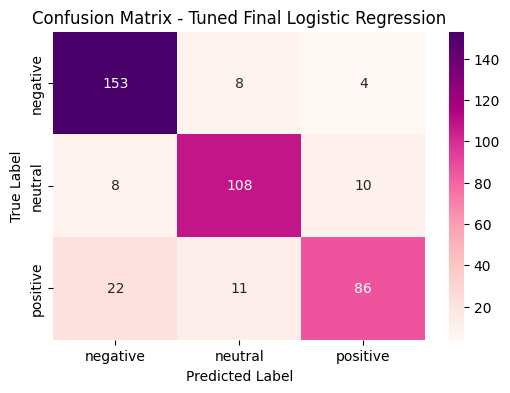

In [ ]:
cm_lr = confusion_matrix(y_test_full, lr_pred, labels=['negative','neutral','positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="RdPu",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.title("Confusion Matrix - Tuned Final Logistic Regression")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

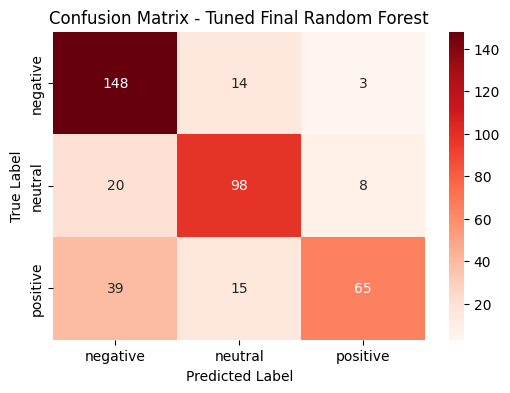

In [ ]:
cm_rf = confusion_matrix(y_test_full, rf_pred, labels=['negative','neutral','positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.title("Confusion Matrix - Tuned Final Random Forest")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

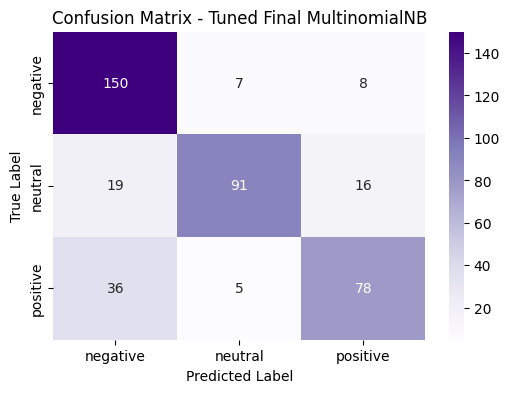

In [ ]:
cm_nb = confusion_matrix(y_test_full, nb_pred, labels=['negative','neutral','positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Purples",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.title("Confusion Matrix - Tuned Final MultinomialNB")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


#**5. Model W2V**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

!pip install gensim
from gensim.models import Word2Vec

# --- 1. Tokenisasi ---
# Jika full_text masih string biasa, split jadi list kata
train_labeled["tokens"] = train_labeled["full_text"].apply(lambda x: x.split())

# --- 2. Train Word2Vec ---
w2v_model = Word2Vec(
    sentences=train_labeled["tokens"],
    vector_size=100,   # ukuran embedding bisa diubah (100–300)
    window=5,
    min_count=2,
    workers=4,
    seed=42
)

# --- 3. Fungsi ubah kalimat jadi embedding (rata-rata kata) ---
def sentence_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(vectors, axis=0)

# --- 4. Konversi seluruh data jadi embedding ---
X_w2v = np.array([sentence_vector(tokens) for tokens in train_labeled["tokens"]])
y = train_labeled["auto_label"]

# --- 5. Train-Test Split ---
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(
    X_w2v, y, test_size=0.2, random_state=42, stratify=y
)

print("Selesai: Word2Vec embeddings siap untuk training model!")
print("X_train_w2v shape:", X_train_w2v.shape)
print("X_test_w2v shape:", X_test_w2v.shape)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 42.7 MB/s eta 0:00:00
Selesai: Word2Vec embeddings siap untuk training model!
X_train_w2v shape: (544, 100)
X_test_w2v shape: (137, 100)


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

print("=== SVM (W2V) ===")

svm_w2v = LinearSVC()
svm_w2v.fit(X_train_w2v, y_train)

svm_pred = svm_w2v.predict(X_test_w2v)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

=== SVM (W2V) ===
SVM Accuracy: 0.3284671532846715
              precision    recall  f1-score   support

    negative       0.29      0.47      0.36        45
     neutral       0.39      0.50      0.44        46
    positive       0.17      0.02      0.04        46

    accuracy                           0.33       137
   macro avg       0.28      0.33      0.28       137
weighted avg       0.28      0.33      0.28       137



In [ ]:
from sklearn.linear_model import LogisticRegression

print("=== Logistic Regression (W2V) ===")

lr_w2v = LogisticRegression(max_iter=5000, random_state=42)
lr_w2v.fit(X_train_w2v, y_train)

lr_pred = lr_w2v.predict(X_test_w2v)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

=== Logistic Regression (W2V) ===
Logistic Regression Accuracy: 0.3284671532846715
              precision    recall  f1-score   support

    negative       0.29      0.49      0.37        45
     neutral       0.37      0.50      0.43        46
    positive       0.00      0.00      0.00        46

    accuracy                           0.33       137
   macro avg       0.22      0.33      0.26       137
weighted avg       0.22      0.33      0.26       137



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

print("=== Random Forest (W2V) ===")

rf_w2v = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
rf_w2v.fit(X_train_w2v, y_train)

rf_pred = rf_w2v.predict(X_test_w2v)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

=== Random Forest (W2V) ===
Random Forest Accuracy: 0.39416058394160586
              precision    recall  f1-score   support

    negative       0.36      0.36      0.36        45
     neutral       0.46      0.46      0.46        46
    positive       0.36      0.37      0.37        46

    accuracy                           0.39       137
   macro avg       0.39      0.39      0.39       137
weighted avg       0.39      0.39      0.39       137



In [ ]:
from sklearn.naive_bayes import GaussianNB

print("=== Gaussian Naive Bayes (W2V) ===")

nb_w2v = GaussianNB()
nb_w2v.fit(X_train_w2v, y_train)

nb_pred = nb_w2v.predict(X_test_w2v)

print("GaussianNB Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

=== Gaussian Naive Bayes (W2V) ===
GaussianNB Accuracy: 0.34306569343065696
              precision    recall  f1-score   support

    negative       0.33      0.71      0.45        45
     neutral       0.52      0.24      0.33        46
    positive       0.21      0.09      0.12        46

    accuracy                           0.34       137
   macro avg       0.35      0.35      0.30       137
weighted avg       0.35      0.34      0.30       137



In [ ]:
unlabeled_df["tokens"] = unlabeled_df["full_text"].astype(str).apply(lambda x: x.split())

def sentence_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

X_unlabeled_w2v = np.array([sentence_vector(tokens, w2v_model) for tokens in unlabeled_df["tokens"]])

print("Jumlah data unlabeled:", X_unlabeled_w2v.shape[0])

Jumlah data unlabeled: 1368


In [ ]:
pseudo_labels = svm_w2v.predict(X_unlabeled_w2v)

unlabeled_df["pseudo_label"] = pseudo_labels

unlabeled_df[["full_text", "pseudo_label"]].head(20)

,full_text,pseudo_label
681,adek gue di-php-in mbg harusnya hari ini dapet...,neutral
682,@okiksadboi Wkwkw apa kabar tuh si orang goblo...,neutral
683,Bahan baku minyak babi memang digunakan dalam ...,negative
684,@kompascom cerita dari ponakan² gue di sekolah...,positive
685,@nashihah_ @FunJunkies Nah ... Ini cocok jadi ...,negative
686,Beneran sampe gak tau lagi mau komen gimana. I...,neutral
687,@widdyjp Loh kan MBG isinya udah include susu mas,neutral
688,@tanyabiartahu Berdasarkan laporan media seper...,negative
689,Food Tray MBG: Menu Bergizi Bikin Anak SD di L...,negative
690,@ubegebe1 Hehe. Program MBG ini memang tdk leb...,neutral


In [ ]:
combined_df = pd.concat([
    train_labeled[["full_text", "auto_label"]].rename(columns={"auto_label": "label"}),
    unlabeled_df[["full_text", "pseudo_label"]].rename(columns={"pseudo_label": "label"})
], ignore_index=True)

print("Jumlah data total setelah ditambah pseudo-label:", len(combined_df))

Jumlah data total setelah ditambah pseudo-label: 2049


In [ ]:
combined_df["tokens"] = combined_df["full_text"].apply(lambda x: str(x).split())

X_full_w2v = np.array([sentence_vector(tokens, w2v_model) for tokens in combined_df["tokens"]])
y_full = combined_df["label"]

X_train_full_w2v, X_test_full_w2v, y_train_full, y_test_full = train_test_split(
    X_full_w2v, y_full, test_size=0.2, random_state=42, stratify=y_full
)

print("Selesai: Dataset gabungan sudah diubah ke Word2Vec embeddings!")
print("X_train_full_w2v shape:", X_train_full_w2v.shape)
print("X_test_full_w2v shape:", X_test_full_w2v.shape)

Selesai: Dataset gabungan sudah diubah ke Word2Vec embeddings!
X_train_full_w2v shape: (1639, 100)
X_test_full_w2v shape: (410, 100)


In [ ]:
print("=== FINAL MODEL: SVM (Word2Vec) ===")

svm_final_w2v = LinearSVC()
svm_final_w2v.fit(X_train_full_w2v, y_train_full)

final_pred_w2v = svm_final_w2v.predict(X_test_full_w2v)

print("Final Model Accuracy: SVM (W2V):", accuracy_score(y_test_full, final_pred_w2v))
print(classification_report(y_test_full, final_pred_w2v))

=== FINAL MODEL: SVM (Word2Vec) ===
Final Model Accuracy: SVM (W2V): 0.7560975609756098
              precision    recall  f1-score   support

    negative       0.73      0.89      0.80       178
     neutral       0.78      0.84      0.81       181
    positive       0.00      0.00      0.00        51

    accuracy                           0.76       410
   macro avg       0.50      0.58      0.54       410
weighted avg       0.66      0.76      0.71       410



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.preprocessing import StandardScaler

print("=== TUNED FINAL SVM (Word2Vec) ===")

scaler = StandardScaler()
X_train_w2v_scaled = scaler.fit_transform(X_train_full_w2v)
X_test_w2v_scaled  = scaler.transform(X_test_full_w2v)

param_svm = {
    "C": [2, 5, 10, 20],
    "class_weight": ["balanced"]
}

grid_svm_w2v = GridSearchCV(
    LinearSVC(max_iter=5000),
    param_svm,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

grid_svm_w2v.fit(X_train_w2v_scaled, y_train_full)

svm_best_w2v = grid_svm_w2v.best_estimator_

svm_pred_w2v = svm_best_w2v.predict(X_test_w2v_scaled)

print("Best Params:", grid_svm_w2v.best_params_)
print(f"CV Best Score: {grid_svm_w2v.best_score_:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_full, svm_pred_w2v):.2f}")
print(classification_report(y_test_full,svm_pred_w2v,digits=2))

=== TUNED FINAL SVM (Word2Vec) ===
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'C': 10, 'class_weight': 'balanced'}
CV Best Score: 0.55
Test Accuracy: 0.66
              precision    recall  f1-score   support

    negative       0.70      0.79      0.74       178
     neutral       0.73      0.66      0.70       181
    positive       0.20      0.18      0.19        51

    accuracy                           0.66       410
   macro avg       0.54      0.54      0.54       410
weighted avg       0.65      0.66      0.65       410



In [ ]:
print("=== FINAL MODEL: Logistic Regression (Word2Vec) ===")

lr_final_w2v = LogisticRegression(max_iter=5000, random_state=42)
lr_final_w2v.fit(X_train_full_w2v, y_train_full)

lr_pred_w2v = lr_final_w2v.predict(X_test_full_w2v)

print("LR Final Accuracy (W2V):", accuracy_score(y_test_full, lr_pred_w2v))
print(classification_report(y_test_full, lr_pred_w2v))

=== FINAL MODEL: Logistic Regression (Word2Vec) ===
LR Final Accuracy (W2V): 0.7536585365853659
              precision    recall  f1-score   support

    negative       0.72      0.89      0.80       178
     neutral       0.79      0.83      0.81       181
    positive       0.00      0.00      0.00        51

    accuracy                           0.75       410
   macro avg       0.50      0.57      0.54       410
weighted avg       0.66      0.75      0.70       410



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("=== TUNED FINAL LOGISTIC REGRESSION (Word2Vec) ===")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full_w2v)
X_test_scaled  = scaler.transform(X_test_full_w2v)

param_lr = {
    "C": [0.1, 0.5, 1, 2, 5, 10],
    "penalty": ["l2"],
    "solver": ["liblinear"],
    "class_weight": ["balanced"]
}

grid_lr_w2v = GridSearchCV(
    LogisticRegression(max_iter=5000, random_state=42),
    param_lr,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_lr_w2v.fit(X_train_scaled, y_train_full)

lr_best_w2v = grid_lr_w2v.best_estimator_

lr_pred_w2v = lr_best_w2v.predict(X_test_scaled)

print("Best Params:", grid_lr_w2v.best_params_)
print(f"CV Best Score: {grid_lr_w2v.best_score_:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_full, lr_pred_w2v):.2f}")
print(classification_report(y_test_full, lr_pred_w2v, digits=2))

=== TUNED FINAL LOGISTIC REGRESSION (Word2Vec) ===
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
CV Best Score: 0.71
Test Accuracy: 0.70
              precision    recall  f1-score   support

    negative       0.72      0.79      0.76       178
     neutral       0.76      0.75      0.76       181
    positive       0.22      0.16      0.18        51

    accuracy                           0.70       410
   macro avg       0.57      0.57      0.57       410
weighted avg       0.68      0.70      0.69       410



In [ ]:
print("=== FINAL MODEL: Random Forest (Word2Vec) ===")

rf_final_w2v = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf_final_w2v.fit(X_train_full_w2v, y_train_full)

rf_pred_w2v = rf_final_w2v.predict(X_test_full_w2v)

print("RF Final Accuracy (W2V):", accuracy_score(y_test_full, rf_pred_w2v))
print(classification_report(y_test_full, rf_pred_w2v))

=== FINAL MODEL: Random Forest (Word2Vec) ===
RF Final Accuracy (W2V): 0.6414634146341464
              precision    recall  f1-score   support

    negative       0.67      0.72      0.70       178
     neutral       0.70      0.75      0.72       181
    positive       0.00      0.00      0.00        51

    accuracy                           0.64       410
   macro avg       0.46      0.49      0.47       410
weighted avg       0.60      0.64      0.62       410



In [ ]:
param_rf = {
    "n_estimators": [200, 300, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5],
}

grid_rf_w2v = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_rf_w2v.fit(X_train_full_w2v, y_train_full)

rf_best_w2v = grid_rf_w2v.best_estimator_

rf_pred_w2v = rf_best_w2v.predict(X_test_full_w2v)

print("=== TUNED FINAL RANDOM FOREST (Word2Vec) ===")
print("Best Params:", grid_rf_w2v.best_params_)
print("CV Best Score:", grid_rf_w2v.best_score_)
print("Test Accuracy:", accuracy_score(y_test_full, rf_pred_w2v))
print(classification_report(y_test_full, rf_pred_w2v))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
=== TUNED FINAL RANDOM FOREST (Word2Vec) ===
Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}
CV Best Score: 0.75655627657194
Test Accuracy: 0.7292682926829268
              precision    recall  f1-score   support

    negative       0.73      0.85      0.78       178
     neutral       0.76      0.82      0.79       181
    positive       0.00      0.00      0.00        51

    accuracy                           0.73       410
   macro avg       0.49      0.56      0.52       410
weighted avg       0.65      0.73      0.69       410



In [ ]:
print("=== FINAL MODEL: GaussianNB (Word2Vec) ===")

# Gunakan var_smoothing lebih besar agar numerik stabil
nb_final_w2v = GaussianNB(var_smoothing=1e-05)
nb_final_w2v.fit(X_train_full_w2v, y_train_full)

nb_pred_w2v = nb_final_w2v.predict(X_test_full_w2v)

print("GaussianNB Final Accuracy (W2V):", accuracy_score(y_test_full, nb_pred_w2v))
print(classification_report(y_test_full, nb_pred_w2v))

=== FINAL MODEL: GaussianNB (Word2Vec) ===
GaussianNB Final Accuracy (W2V): 0.6073170731707317
              precision    recall  f1-score   support

    negative       0.71      0.87      0.78       178
     neutral       0.84      0.45      0.59       181
    positive       0.13      0.24      0.17        51

    accuracy                           0.61       410
   macro avg       0.56      0.52      0.51       410
weighted avg       0.69      0.61      0.62       410



In [ ]:
param_nb = {
    "var_smoothing": [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04]
}

grid_nb_w2v = GridSearchCV(
    GaussianNB(),
    param_nb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_nb_w2v.fit(X_train_full_w2v, y_train_full)

nb_best_w2v = grid_nb_w2v.best_estimator_
nb_pred_w2v = nb_best_w2v.predict(X_test_full_w2v)

print("=== TUNED FINAL GAUSSIAN NB (Word2Vec) ===")
print("Best Params:", grid_nb_w2v.best_params_)
print("CV Best Score:", grid_nb_w2v.best_score_)
print("Test Accuracy:", accuracy_score(y_test_full, nb_pred_w2v))
print(classification_report(y_test_full, nb_pred_w2v))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
=== TUNED FINAL GAUSSIAN NB (Word2Vec) ===
Best Params: {'var_smoothing': 1e-09}
CV Best Score: 0.5954575967778026
Test Accuracy: 0.6073170731707317
              precision    recall  f1-score   support

    negative       0.71      0.87      0.78       178
     neutral       0.84      0.45      0.59       181
    positive       0.13      0.24      0.17        51

    accuracy                           0.61       410
   macro avg       0.56      0.52      0.51       410
weighted avg       0.69      0.61      0.62       410



#**CONFUSION METRIK W2V**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

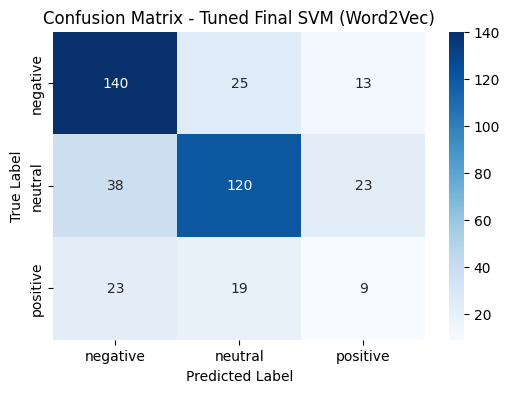

In [ ]:
cm_svm_w2v = confusion_matrix(y_test_full, svm_pred_w2v, labels=['negative','neutral','positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm_w2v, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.title("Confusion Matrix - Tuned Final SVM (Word2Vec)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

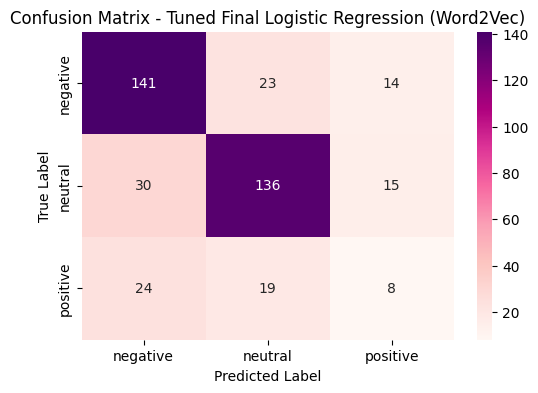

In [ ]:
cm_lr_w2v = confusion_matrix(y_test_full, lr_pred_w2v, labels=['negative','neutral','positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr_w2v, annot=True, fmt="d", cmap="RdPu",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.title("Confusion Matrix - Tuned Final Logistic Regression (Word2Vec)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

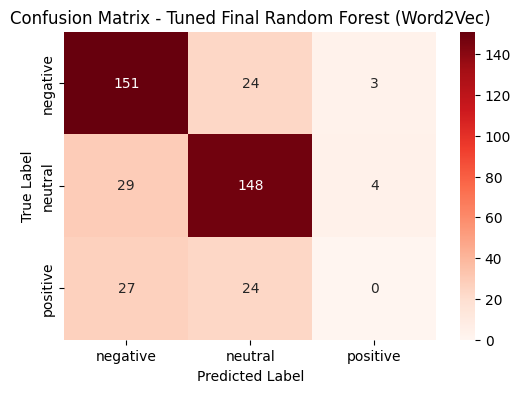

In [ ]:
cm_rf_w2v = confusion_matrix(y_test_full, rf_pred_w2v, labels=['negative','neutral','positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf_w2v, annot=True, fmt="d", cmap="Reds",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.title("Confusion Matrix - Tuned Final Random Forest (Word2Vec)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

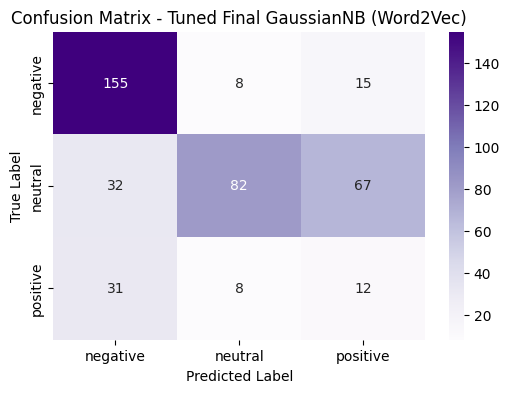

In [ ]:
cm_nb_w2v = confusion_matrix(y_test_full, nb_pred_w2v, labels=['negative','neutral','positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_nb_w2v, annot=True, fmt="d", cmap="Purples",
            xticklabels=['negative','neutral','positive'],
            yticklabels=['negative','neutral','positive'])
plt.title("Confusion Matrix - Tuned Final GaussianNB (Word2Vec)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

#**VISUALISASI**

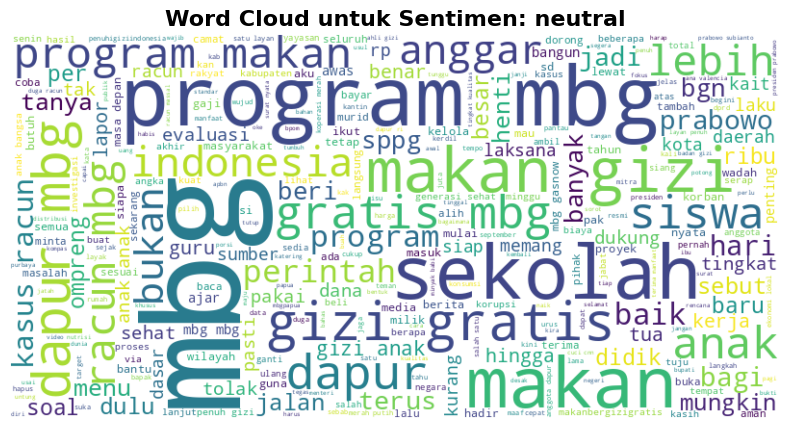

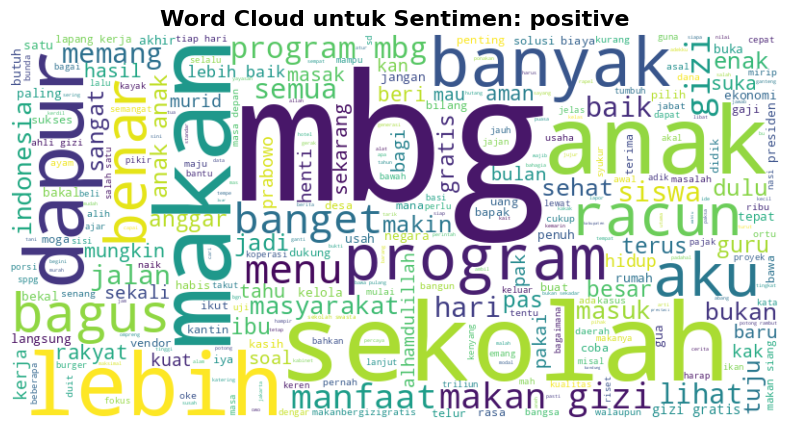

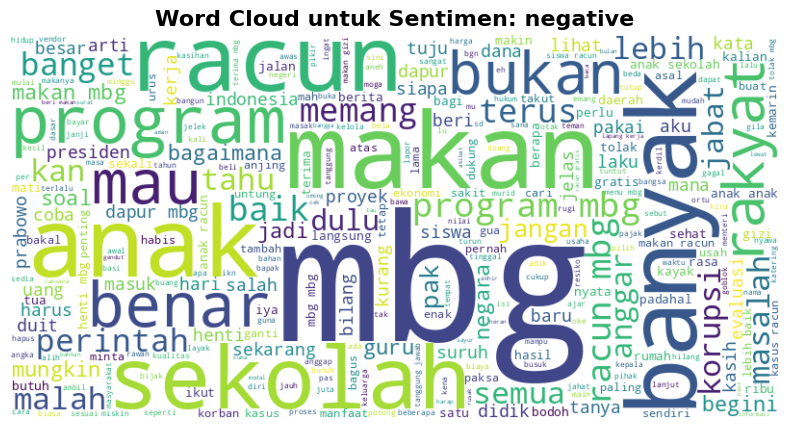

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv("data_clean.csv")

label_col = "auto_label"

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'rt', 'amp', '…', 'yg', 'nya'])

def plot_wordcloud(df, label_name):
    text = " ".join(df[df[label_col] == label_name]["text_clean"].astype(str))

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=300,
        stopwords=stopwords
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud untuk Sentimen: {label_name}", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

unique_labels = df[label_col].unique()

for label in unique_labels:
    plot_wordcloud(df, label)


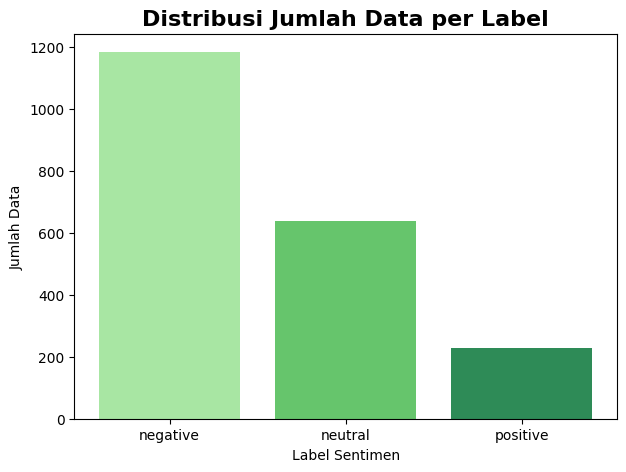

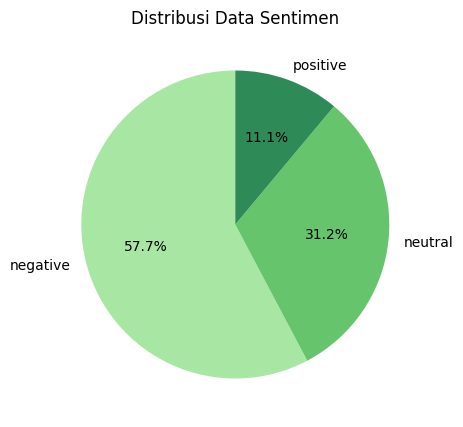

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_clean.csv")

label_col = "auto_label"

label_counts = df[label_col].value_counts()

green_colors = ["#A8E6A3", "#66C56C", "#2E8B57"]

plt.figure(figsize=(7,5))
plt.bar(label_counts.index, label_counts.values, color=green_colors)
plt.title("Distribusi Jumlah Data per Label", fontsize=16, fontweight='bold')
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Data")
plt.show()

plt.figure(figsize=(7,5))
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%',
        colors=green_colors, startangle=90)
plt.title("Distribusi Data Sentimen")
plt.show()


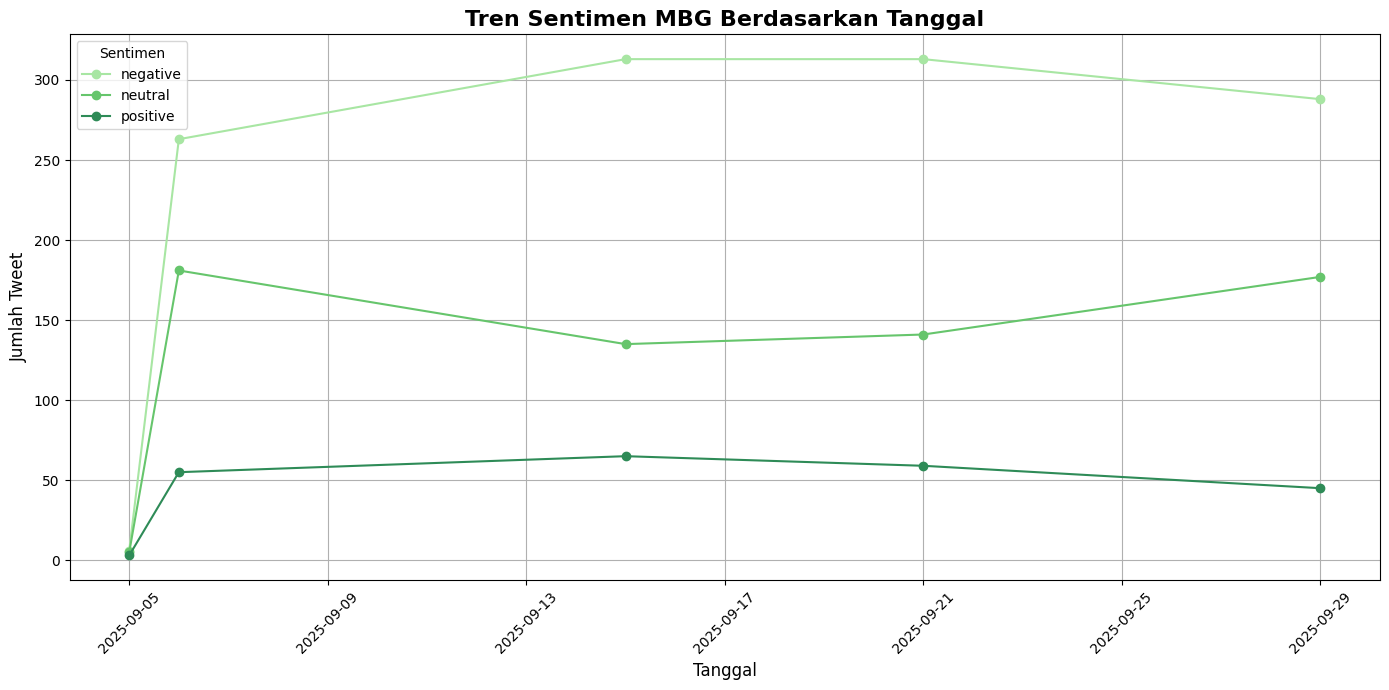

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data_clean.csv")

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['date'] = df['created_at'].dt.date

label_col = 'auto_label'
label_counts_by_date = (
    df.groupby(['date', label_col])
      .size()
      .reset_index(name='count')
)

pivot_table = label_counts_by_date.pivot_table(
    index='date',
    columns=label_col,
    values='count',
    fill_value=0
)

green_colors = ["#A8E6A3", "#66C56C", "#2E8B57"]

plt.figure(figsize=(14, 7))

for (col, color) in zip(pivot_table.columns, green_colors):
    plt.plot(pivot_table.index, pivot_table[col], marker="o", color=color, label=col)

plt.title('Tren Sentimen MBG Berdasarkan Tanggal', fontsize=16, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Sentimen")

plt.tight_layout()
plt.show()



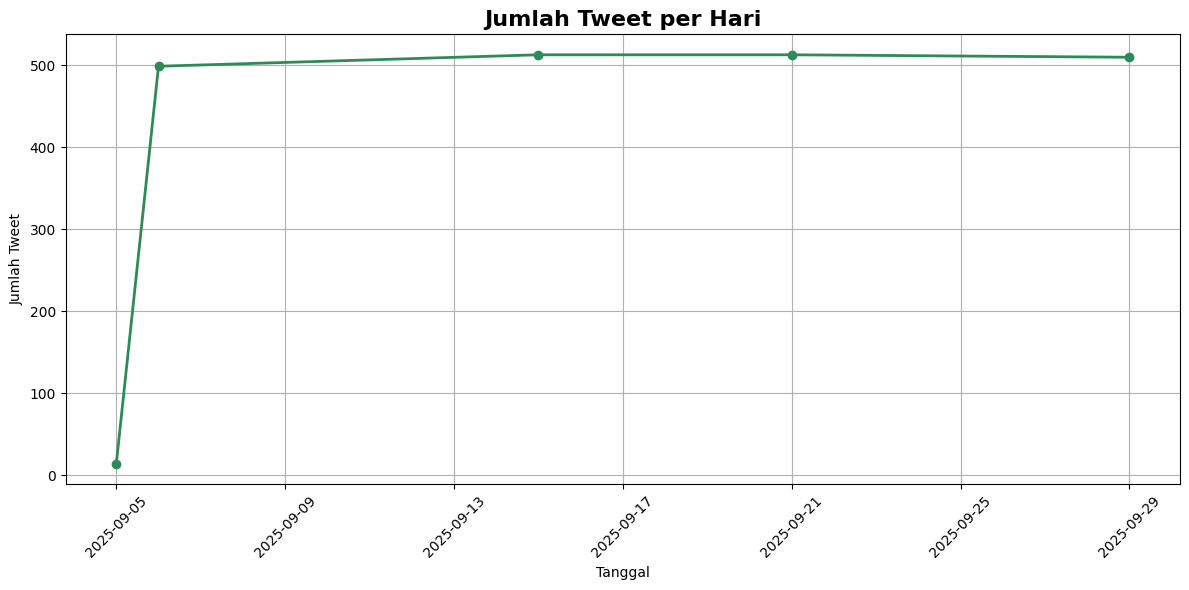

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_clean.csv")

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['date'] = df['created_at'].dt.date

tweets_per_day = df.groupby('date').size()

plt.figure(figsize=(12,6))
plt.plot(tweets_per_day.index, tweets_per_day.values, marker='o', linewidth=2, color="#2E8B57")
plt.title("Jumlah Tweet per Hari", fontsize=16, fontweight="bold")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

